In [5]:
import numpy as np
x = np.array([[12]])
print(x)
print(type(x))
print(x.dtype)
print(x.ndim)
print(x.shape)

[[12]]
<class 'numpy.ndarray'>
int32
2
(1, 1)


In [6]:
x = np.array([12, 3, 6, 14])
print(x)
print(type(x))
print(x.dtype)
print(x.ndim)
print(x.shape)
print(len(x))

[12  3  6 14]
<class 'numpy.ndarray'>
int32
1
(4,)
4


In [7]:
x = np.array([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]])
print(x)
print(type(x))
print(x.dtype)
print(x.ndim)
print(x.shape)
print(len(x))

[[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]]
<class 'numpy.ndarray'>
int32
2
(3, 5)
3


In [8]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
print(train_images.ndim)  #the number of axes of the tensor train_images
print(train_images.shape)  #shape
print(train_images.dtype)  #its data type

3
(60000, 28, 28)
uint8


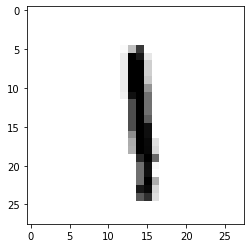

In [11]:
digit = train_images[8]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [14]:
my_slice = train_images[10:100,1:9,12:25]  #selects digits #10 to #100 (#100 isn’t included)
print(my_slice.shape)

(90, 8, 13)


In [15]:
batch = train_images[:128]

In [17]:
batch.shape

(128, 28, 28)

In [22]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2,3],[4,5,6]])
print(a/b)
print(np.matmul(a,b.T))

[[1. 1. 1.]
 [1. 1. 1.]]
[[14 32]
 [32 77]]


In [23]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [26]:
x = np.array([[-5, -78, 2, 34, 0], [6, -79, 3, 35, 1], [7, 80, -4, -36, 2]])
y = np.array([[100, 100, 100, 100, 100], [100, 100, 100, 100, 100], [-100, -100, -100, -100, -100]])
print(x)
print(y)
print(np.maximum(naive_add(x,y), 0.))

[[ -5 -78   2  34   0]
 [  6 -79   3  35   1]
 [  7  80  -4 -36   2]]
[[ 100  100  100  100  100]
 [ 100  100  100  100  100]
 [-100 -100 -100 -100 -100]]
[[ 95.  22. 102. 134. 100.]
 [106.  21. 103. 135. 101.]
 [  0.   0.   0.   0.   0.]]


In [27]:
def naive_relu(x):
    assert len(x.shape) == 2  #lets you test if a condition in your code returns True
                                #x is a 2D Numpy tensor
    x = x.copy()  #avoid overwriting the input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [29]:
print(naive_relu(naive_add(x,y)))

[[ 95  22 102 134 100]
 [106  21 103 135 101]
 [  0   0   0   0   0]]


In [30]:
#broadcasting


In [35]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
print(a)
b = np.array([0, 1, 2])
print(b)
print(a + b)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]]
[0 1 2]
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [37]:
a = np.ones((4, 5))
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [41]:
a[0] = 4
a
print(a.shape)

(4, 5)


In [45]:
a = a[:,: , np.newaxis]  # adds a new axis -> 2D array
print(a.shape)

(4, 1, 1, 5)


In [43]:
print(a)

[[[4. 4. 4. 4. 4.]]

 [[1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]]]


In [47]:
y = np.random.random((32, 10))
y

array([[7.54807583e-01, 1.94437757e-01, 7.33099709e-01, 4.08303345e-02,
        9.16391886e-01, 8.79944636e-01, 7.66399416e-01, 8.02047414e-01,
        7.26774026e-01, 9.70152999e-01],
       [6.65796759e-04, 8.70213027e-01, 2.17948434e-01, 4.63539190e-01,
        5.53897172e-01, 1.56405280e-01, 9.71789634e-01, 6.87075783e-01,
        5.60724692e-01, 5.09010671e-01],
       [9.17124798e-01, 1.60013336e-01, 5.25789673e-02, 5.28707542e-01,
        1.07092350e-01, 1.26050490e-01, 3.80020112e-01, 4.78775642e-01,
        9.96196739e-01, 4.80841244e-01],
       [3.97089779e-01, 2.65373010e-01, 8.78839596e-01, 3.66630616e-01,
        5.98447618e-01, 6.26470142e-01, 5.90156534e-02, 1.22929691e-01,
        3.17022277e-01, 8.49438866e-01],
       [3.96392974e-01, 5.41007341e-01, 1.02413617e-02, 8.52531973e-01,
        2.98808841e-01, 5.23798764e-02, 9.41184310e-01, 7.29233270e-01,
        5.58354463e-01, 7.84468991e-01],
       [1.74118383e-01, 7.97898074e-01, 3.60223198e-01, 8.27998512e-01,
   

In [59]:
b = np.array([0, 1, 2], dtype=np.float64)
print(b)
print(b[-2])

[0. 1. 2.]
1.0


In [49]:
a = np.tile(np.arange(0, 40, 10), (3, 1))
a

array([[ 0, 10, 20, 30],
       [ 0, 10, 20, 30],
       [ 0, 10, 20, 30]])

In [54]:
print(a.reshape(12))

[ 0 10 20 30  0 10 20 30  0 10 20 30]


## Tensory w PyTorch

In [61]:
import torch
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [62]:
x_data

tensor([[1, 2],
        [3, 4]])

In [64]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [65]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0936, 0.8739],
        [0.9465, 0.6613]]) 



In [66]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2937, 0.2363, 0.0636],
        [0.5123, 0.9273, 0.7254]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [67]:
import torch
b = torch.tensor([1., 2., 3.])
print(b.dtype)
print(b.shape)
print(b.matmul(b))
#this works too
print(b.dot(b))

torch.float32
torch.Size([3])
tensor(14.)
tensor(14.)


In [68]:
print(torch.cuda.is_available())
#Loading Data onto the GPU
b = b.to(torch.device('cuda:0'))
print(b)

True
tensor([1., 2., 3.], device='cuda:0')


In [71]:
b.to(torch.device('cpu'))
print(b.cpu())
print(b)

tensor([1., 2., 3.])
tensor([1., 2., 3.], device='cuda:0')
